## Assessing the Image Dataset for Auto-Encoder Model

This notebook evaluates the image dataset for inputs into the Auto-Encoder Model

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pydicom

import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, random_split

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [32]:
annotations = pd.read_csv('finding_annotations.csv')
breast_level_annotations = pd.read_csv('breast-level_annotations.csv')
metadata =  pd.read_csv('metadata.csv')

In [33]:
print(len(breast_level_annotations))
breast_level_annotations.head()

20000


,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,split
0,b8d273e8601f348d3664778dae0e7e0b,b36517b9cbbcfd286a7ae04f643af97a,d8125545210c08e1b1793a5af6458ee2,L,CC,3518,2800,BI-RADS 2,DENSITY C,training
1,b8d273e8601f348d3664778dae0e7e0b,b36517b9cbbcfd286a7ae04f643af97a,290c658f4e75a3f83ec78a847414297c,L,MLO,3518,2800,BI-RADS 2,DENSITY C,training
2,b8d273e8601f348d3664778dae0e7e0b,b36517b9cbbcfd286a7ae04f643af97a,cd0fc7bc53ac632a11643ac4cc91002a,R,CC,3518,2800,BI-RADS 2,DENSITY C,training
3,b8d273e8601f348d3664778dae0e7e0b,b36517b9cbbcfd286a7ae04f643af97a,71638b1e853799f227492bfb08a01491,R,MLO,3518,2800,BI-RADS 2,DENSITY C,training
4,8269f5971eaca3e5d3772d1796e6bd7a,d931832a0815df082c085b6e09d20aac,dd9ce3288c0773e006a294188aadba8e,L,CC,3518,2800,BI-RADS 1,DENSITY C,training


In [47]:
breast_level_annotations.breast_birads.value_counts(dropna=False)

breast_birads
BI-RADS 1    13406
BI-RADS 2     4676
BI-RADS 3      930
BI-RADS 4      762
BI-RADS 5      226
Name: count, dtype: int64

In [34]:
print(len(annotations))
annotations.head()

20486


,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split
0,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,4e3a578fe535ea4f5258d3f7f4419db8,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2355.139893,1731.640015,2482.979980,1852.750000,training
1,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,dac39351b0f3a8c670b7f8dc88029364,R,MLO,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2386.679932,1240.609985,2501.800049,1354.040039,training
2,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,c83f780904f25eacb44e9030f32c66e1,R,CC,3518,2800,BI-RADS 3,DENSITY C,['Global Asymmetry'],BI-RADS 3,2279.179932,1166.510010,2704.439941,2184.260010,training
3,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,893528bc38a0362928a89364f1b692fd,R,MLO,3518,2800,BI-RADS 3,DENSITY C,['Global Asymmetry'],BI-RADS 3,1954.270020,1443.640015,2589.760010,2193.810059,training
4,c3487424fee1bdd4515b72dc3fd69813,77619c914263eae44e9099f1ce07192c,318264c881bf12f2c1efe5f93920cc37,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Architectural Distortion'],BI-RADS 4,2172.300049,1967.410034,2388.699951,2147.159912,training


In [35]:
print(len(metadata))
metadata

20000


,SOP Instance UID,Series Instance UID,SOP Instance UID.1,Patient's Age,View Position,Image Laterality,Photometric Interpretation,Rows,Columns,Imager Pixel Spacing,...,Pixel Padding Value,Pixel Padding Range Limit,Window Center,Window Width,Rescale Intercept,Rescale Slope,Rescale Type,Window Center & Width Explanation,Manufacturer,Manufacturer's Model Name
0,d8125545210c08e1b1793a5af6458ee2,b36517b9cbbcfd286a7ae04f643af97a,d8125545210c08e1b1793a5af6458ee2,053Y,CC,L,MONOCHROME2,3518,2800,"[0.085, 0.085]",...,0,NaN,1662,1500,0,1,US,linear LUT,SIEMENS,Mammomat Inspiration
1,290c658f4e75a3f83ec78a847414297c,b36517b9cbbcfd286a7ae04f643af97a,290c658f4e75a3f83ec78a847414297c,053Y,MLO,L,MONOCHROME2,3518,2800,"[0.085, 0.085]",...,0,NaN,1664,1500,0,1,US,linear LUT,SIEMENS,Mammomat Inspiration
2,cd0fc7bc53ac632a11643ac4cc91002a,b36517b9cbbcfd286a7ae04f643af97a,cd0fc7bc53ac632a11643ac4cc91002a,053Y,CC,R,MONOCHROME2,3518,2800,"[0.085, 0.085]",...,0,NaN,1600,1500,0,1,US,linear LUT,SIEMENS,Mammomat Inspiration
3,71638b1e853799f227492bfb08a01491,b36517b9cbbcfd286a7ae04f643af97a,71638b1e853799f227492bfb08a01491,053Y,MLO,R,MONOCHROME2,3518,2800,"[0.085, 0.085]",...,0,NaN,1654,1500,0,1,US,linear LUT,SIEMENS,Mammomat Inspiration
4,dd9ce3288c0773e006a294188aadba8e,d931832a0815df082c085b6e09d20aac,dd9ce3288c0773e006a294188aadba8e,042Y,CC,L,MONOCHROME2,3518,2800,"[0.085, 0.085]",...,0,NaN,1580,1500,0,1,US,linear LUT,SIEMENS,Mammomat Inspiration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,ea732154d149f619b20070b78060ae65,2b1b2b8f48abab9819c0b3d091e152ee,ea732154d149f619b20070b78060ae65,038Y,CC,R,MONOCHROME1,2812,2012,"[0.0850, 0.0850]",...,10000,NaN,3574,7148,0,1,US,Default W/L,Planmed,Planmed Nuance
19996,4689616c3d0b46fcba7a771107730791,69d7f07ea04572dad5e5aa62fbcfc4b7,4689616c3d0b46fcba7a771107730791,018Y,CC,R,MONOCHROME2,3580,2702,"[0.0828, 0.0828]",...,0,294.0,"[8338, 8195, 8161, 8283, 8338]","[1828, 1741, 1566, 1915, 1828]",0,1,US,"['CURRENT', 'STANDARD', 'CONTRAST', 'SMOOTH', ...",IMS s.r.l.,GIOTTO CLASS
19997,3c22491bcf1d0b004715c28d80981cdd,69d7f07ea04572dad5e5aa62fbcfc4b7,3c22491bcf1d0b004715c28d80981cdd,018Y,CC,L,MONOCHROME2,3580,2702,"[0.0828, 0.0828]",...,0,1113.0,"[8457, 8321, 8288, 8404, 8457]","[1735, 1653, 1487, 1818, 1735]",0,1,US,"['CURRENT', 'STANDARD', 'CONTRAST', 'SMOOTH', ...",IMS s.r.l.,GIOTTO CLASS
19998,d443b9725e331b8b27589aa725597801,69d7f07ea04572dad5e5aa62fbcfc4b7,d443b9725e331b8b27589aa725597801,018Y,MLO,R,MONOCHROME2,3580,2686,"[0.0828, 0.0828]",...,0,294.0,"[8324, 8185, 8152, 8270, 8324]","[1778, 1694, 1524, 1863, 1778]",0,1,US,"['CURRENT', 'STANDARD', 'CONTRAST', 'SMOOTH', ...",IMS s.r.l.,GIOTTO CLASS


In [36]:
metadata.rename(columns={'SOP Instance UID': 'study_id',
                         'Series Instance UID': 'series_id',
                         'SOP Instance UID.1': 'image_id'}, inplace=True)

In [37]:
metadata.head()

,study_id,series_id,image_id,Patient's Age,View Position,Image Laterality,Photometric Interpretation,Rows,Columns,Imager Pixel Spacing,...,Pixel Padding Value,Pixel Padding Range Limit,Window Center,Window Width,Rescale Intercept,Rescale Slope,Rescale Type,Window Center & Width Explanation,Manufacturer,Manufacturer's Model Name
0,d8125545210c08e1b1793a5af6458ee2,b36517b9cbbcfd286a7ae04f643af97a,d8125545210c08e1b1793a5af6458ee2,053Y,CC,L,MONOCHROME2,3518,2800,"[0.085, 0.085]",...,0,NaN,1662,1500,0,1,US,linear LUT,SIEMENS,Mammomat Inspiration
1,290c658f4e75a3f83ec78a847414297c,b36517b9cbbcfd286a7ae04f643af97a,290c658f4e75a3f83ec78a847414297c,053Y,MLO,L,MONOCHROME2,3518,2800,"[0.085, 0.085]",...,0,NaN,1664,1500,0,1,US,linear LUT,SIEMENS,Mammomat Inspiration
2,cd0fc7bc53ac632a11643ac4cc91002a,b36517b9cbbcfd286a7ae04f643af97a,cd0fc7bc53ac632a11643ac4cc91002a,053Y,CC,R,MONOCHROME2,3518,2800,"[0.085, 0.085]",...,0,NaN,1600,1500,0,1,US,linear LUT,SIEMENS,Mammomat Inspiration
3,71638b1e853799f227492bfb08a01491,b36517b9cbbcfd286a7ae04f643af97a,71638b1e853799f227492bfb08a01491,053Y,MLO,R,MONOCHROME2,3518,2800,"[0.085, 0.085]",...,0,NaN,1654,1500,0,1,US,linear LUT,SIEMENS,Mammomat Inspiration
4,dd9ce3288c0773e006a294188aadba8e,d931832a0815df082c085b6e09d20aac,dd9ce3288c0773e006a294188aadba8e,042Y,CC,L,MONOCHROME2,3518,2800,"[0.085, 0.085]",...,0,NaN,1580,1500,0,1,US,linear LUT,SIEMENS,Mammomat Inspiration


### Distribution of Age 

Let us briefly look at the distribution of Age that can inform our approach.

In [38]:
metadata['Patient\'s Age'].value_counts(dropna=False)

Patient's Age
NaN     2260
045Y     804
044Y     800
042Y     796
043Y     768
        ... 
083Y       4
016Y       4
086Y       4
085Y       4
088Y       4
Name: count, Length: 74, dtype: int64

In [39]:
def get_age(x):
    if x == 'nan':
        return 0
    if x == '0Y':
        return 0
    return int(x.split('Y')[0])

metadata['Age_Str'] = metadata['Patient\'s Age'].astype('str')
metadata['Age'] = metadata['Age_Str'].apply(lambda x: get_age(x))

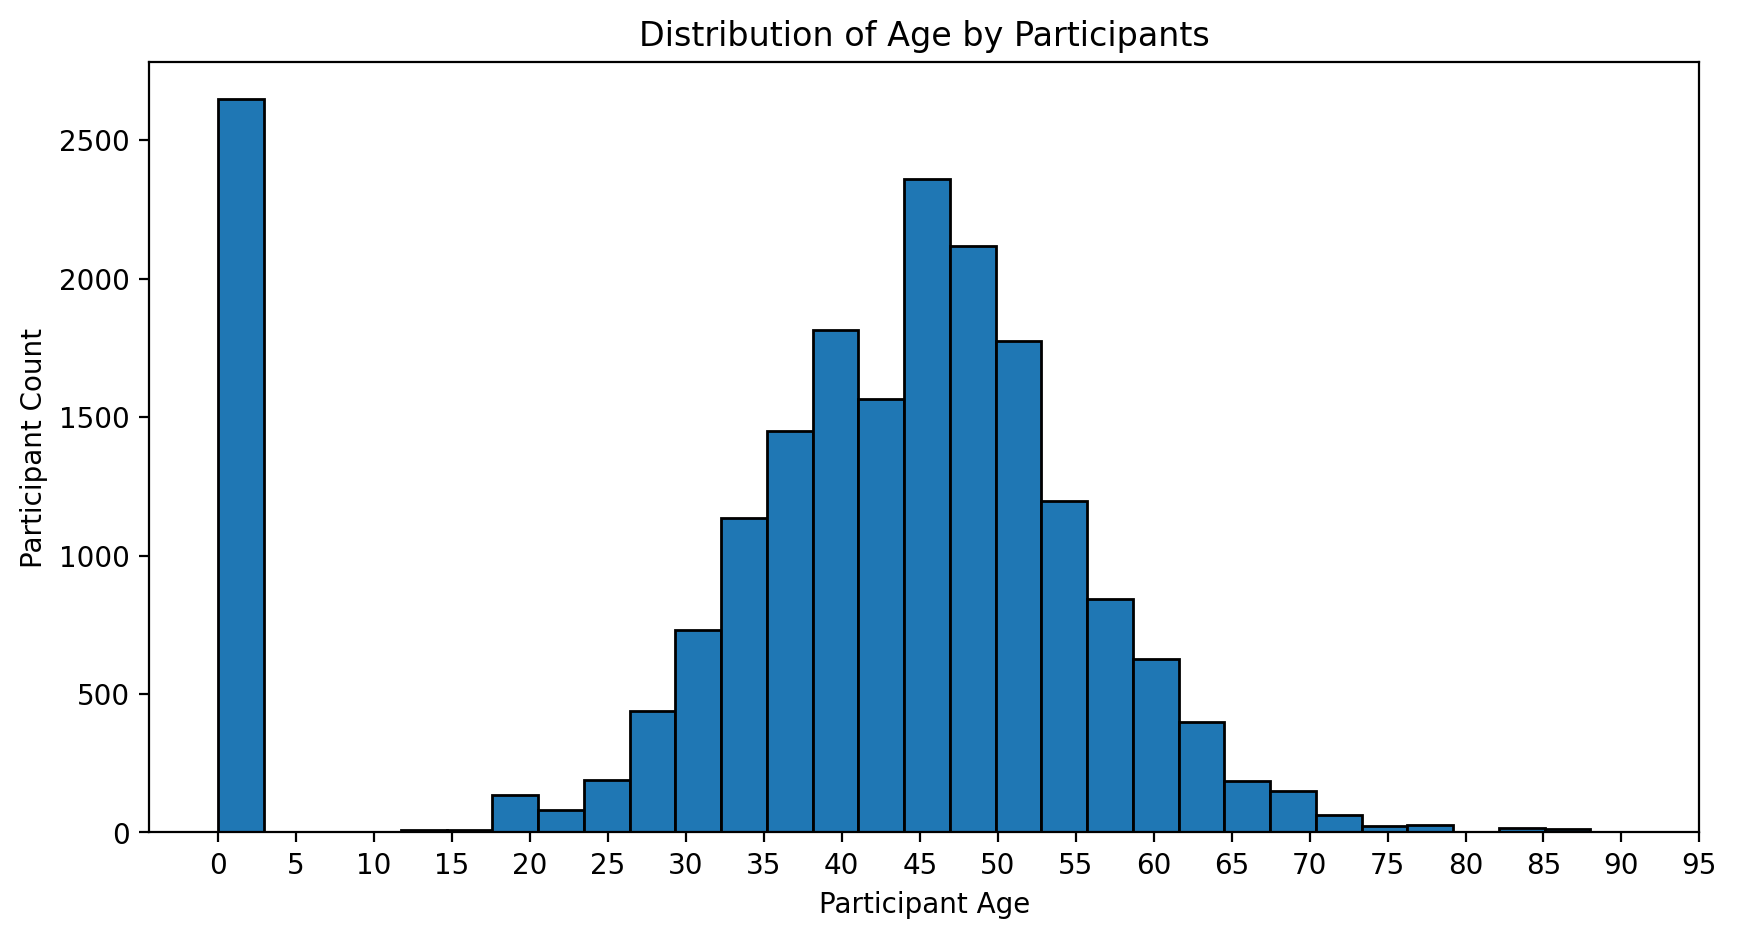

In [40]:
plt.figure(figsize=(10, 5))
plt.hist(metadata['Age'], ec='black', bins=30)
plt.title('Distribution of Age by Participants')
plt.xlabel('Participant Age')
plt.ylabel('Participant Count')
plt.xticks( np.arange(0, 100, 5) )

plt.savefig('report_output/age_distribution_raw.png', dpi=500)

### Note:

There are a few missing values represented by 0. We use mode to replace these to a valid set.

<br>

### Distribution of BI-RADS

Now let's look at the distribution of BI-Rads

Text(0, 0.5, 'Study Image Count')

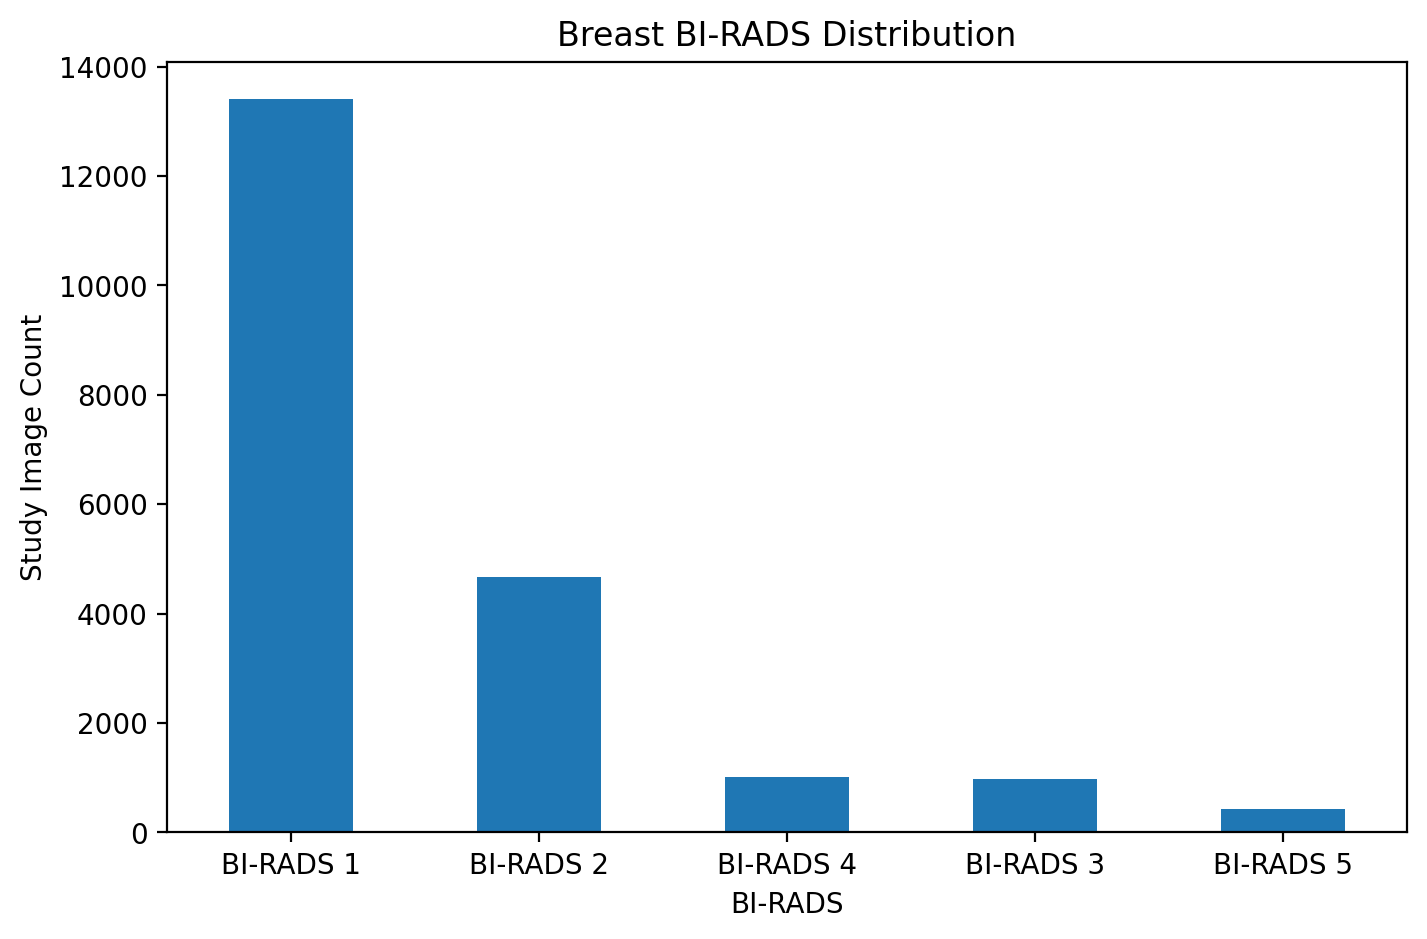

In [41]:
(annotations.breast_birads.value_counts(dropna=False)).plot.bar( figsize=(8,5))
plt.title('Breast BI-RADS Distribution')
plt.xlabel('BI-RADS')
plt.xticks(rotation=0)
plt.ylabel('Study Image Count')

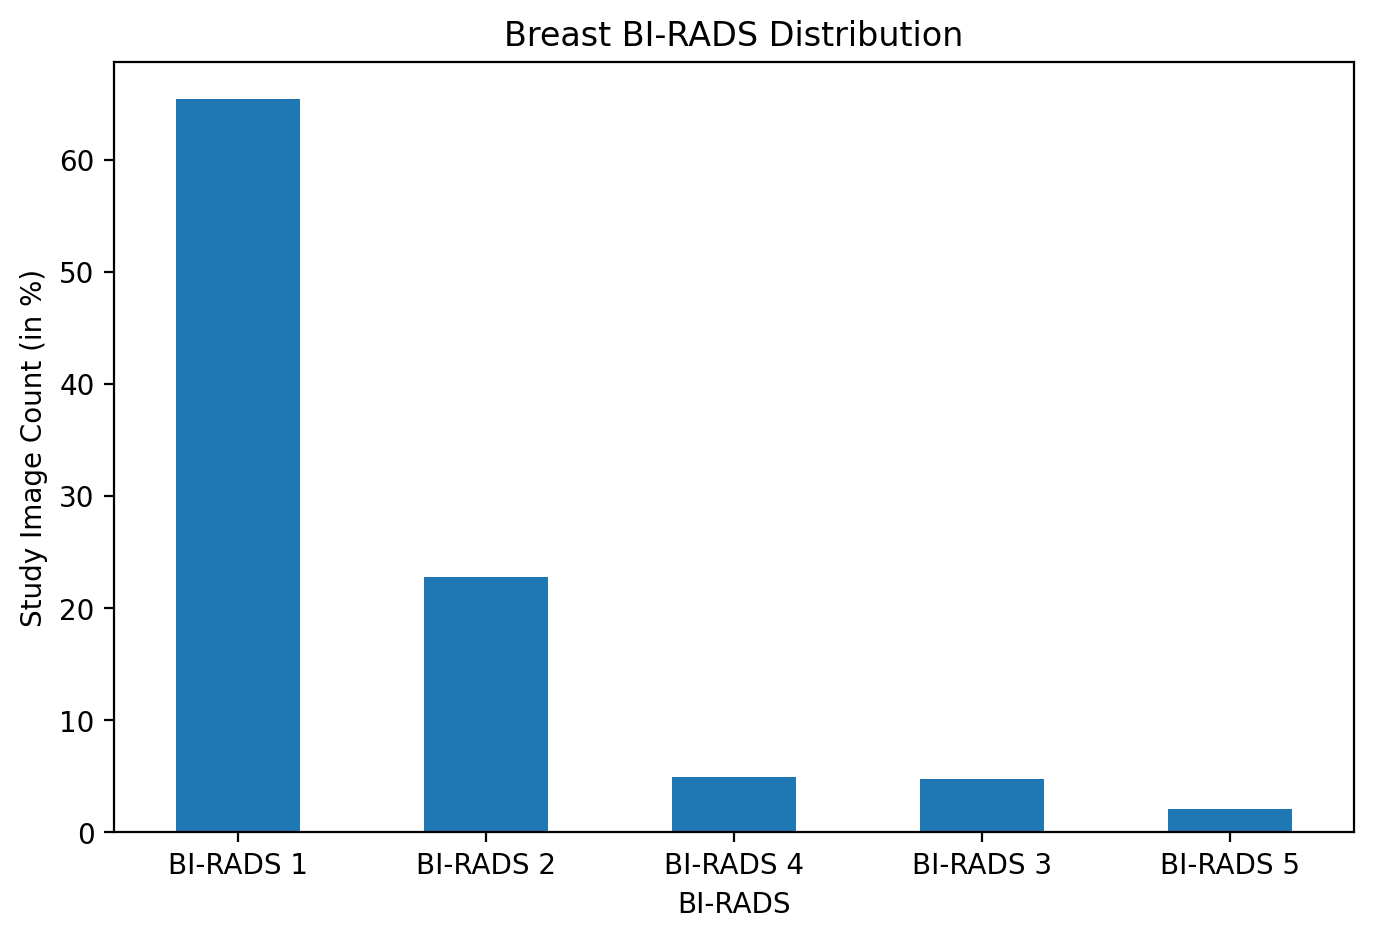

In [42]:
(100* annotations.breast_birads.value_counts(normalize=True)).plot.bar( figsize=(8,5))
plt.title('Breast BI-RADS Distribution')
plt.xlabel('BI-RADS')
plt.xticks(rotation=0)
plt.ylabel('Study Image Count (in %)')

plt.savefig('report_output/birad_classication_normalized.png', dpi=500)

In [43]:
annotations.breast_birads.value_counts(normalize=True)

breast_birads
BI-RADS 1    0.654398
BI-RADS 2    0.228253
BI-RADS 4    0.049058
BI-RADS 3    0.047447
BI-RADS 5    0.020844
Name: proportion, dtype: float64

### Creating a Specific Dataset File

This section focuses on creating 


In [59]:
metadata_subset = metadata[['image_id', 'Age']]
annotations_subset = annotations[['study_id', 'series_id' , 'image_id', 'breast_birads', 'xmin', 'ymin', 'xmax', 'ymax']]
breast_level_subset = breast_level_annotations[['study_id', 'series_id', 'image_id',  'split', 'breast_birads']]

images_df = pd.merge(left=breast_level_subset, right=metadata_subset, how='left', on=['image_id'])
images_df.head()


,study_id,series_id,image_id,split,breast_birads,Age
0,b8d273e8601f348d3664778dae0e7e0b,b36517b9cbbcfd286a7ae04f643af97a,d8125545210c08e1b1793a5af6458ee2,training,BI-RADS 2,53
1,b8d273e8601f348d3664778dae0e7e0b,b36517b9cbbcfd286a7ae04f643af97a,290c658f4e75a3f83ec78a847414297c,training,BI-RADS 2,53
2,b8d273e8601f348d3664778dae0e7e0b,b36517b9cbbcfd286a7ae04f643af97a,cd0fc7bc53ac632a11643ac4cc91002a,training,BI-RADS 2,53
3,b8d273e8601f348d3664778dae0e7e0b,b36517b9cbbcfd286a7ae04f643af97a,71638b1e853799f227492bfb08a01491,training,BI-RADS 2,53
4,8269f5971eaca3e5d3772d1796e6bd7a,d931832a0815df082c085b6e09d20aac,dd9ce3288c0773e006a294188aadba8e,training,BI-RADS 1,42


In [60]:
images_df.to_csv('data_info_file.csv', index=False)